In [1]:
"""
기계학습 측면의 선형회귀모델
"""

from sklearn import datasets # dataset 제공 모듈 
from sklearn.linear_model import LinearRegression # model 생성 
from sklearn.model_selection import train_test_split # train/test split 
from sklearn.metrics import mean_squared_error, r2_score # model 평가 
import pandas as pd
import numpy as np

###############################
### 당료병(diabetes) dataset
###############################

#  dataset load
diabetes = datasets.load_diabetes()

dia_x = diabetes.data  # x변수 
dia_y = diabetes.target # y변수 

print(dia_x.shape) # (442, 10)
print(dia_y.shape) # (442,)

(442, 10)
(442,)


In [2]:
#  x,y 변수 선택 : 단순선형회귀분석 : x(bmi) -> y
dia_x[0]
x = dia_x[:, np.newaxis, 2] # bmi
x.shape # (442) -> (442, 1)
y = dia_y
#print(x) # 표준화(o) 
#print(y) # 표준화(x)

In [3]:
#  train(70%)/test(30%) split 
train_x, test_x, train_y, test_y = train_test_split(
        x, y, test_size = 0.3)

print(train_x.shape) # (309, 1) -> 훈련셋 
print(test_x.shape) # (133, 1) -> 검정셋 
print(train_y.shape) # (309,)
print(test_y.shape) # (133,)

(309, 1)
(133, 1)
(309,)
(133,)


In [4]:
#  model 생성 
lr_model = LinearRegression() # object 생성 
lr_model # object info

LinearRegression()

In [5]:
# 모델 학습 : 훈련셋 이용 
model = lr_model.fit(X = train_x, y = train_y)

In [6]:
# x 1차원 경우 Error -> 해결책 : np.newaxis -> 2차원 
print(lr_model.coef_) # 기울기 :  array([941.73947113])
#lr_model.intercept_ # 절편 : 153.42261539898573
lr_model.intercept_

[909.57783359]


150.07799075852424

In [7]:
# 모델 예측치 : 검정셋 이용 
y_pred = model.predict(X = test_x) # 검정셋 y 예측치 
y_true = test_y

In [8]:
#  model 평가 

#  MSE : mean_squared_error - (y 가 표준화가 되었을때 사용 )
mse = mean_squared_error(y_true, y_pred)
print('MSE =', mse) # MSE = 4116.284062372021
# mse = np.mean((y - y_pred)**2)    = > 0에 가까울수록 좋은 모형

MSE = 3701.9347139396564


In [9]:
#  결정계수(1) : r2_score - 1인경우 좋은 예측치를 보여준다 (y 가 표준화가 안되었을때 사용 )
r2 = r2_score(y_true, y_pred)
print('결정계수 =', r2) # 결정계수 = 0.39175539085556677

결정계수 = 0.3625773575121308


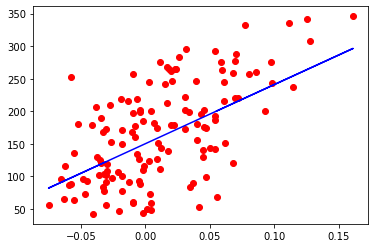

In [10]:
#  회귀선 시각화 : 예측치 이용 
import matplotlib.pyplot as plt

plt.scatter(x = test_x, y = test_y, color='red') # 산점도 
plt.plot(test_x, y_pred, color='blue') # 회귀선 
plt.show()

In [11]:
#########################
### iris.csv -> pandas 데이터 프레임으로 읽어줌
#########################

#  dataset load
iris = pd.read_csv("C:/Users/hyebin/Desktop/study/python_ML/data/iris.csv")
iris.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
#  x,y 변수 선택 
cols = list(iris.columns)
cols

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [13]:
y_col = cols[0] # 'Sepal.Length'
x_cols = cols[1:4] # ['Sepal.Width', 'Petal.Length', 'Petal.Width']

In [14]:
# subset : 5번 칼럼 제외 
iris_df = iris[cols[:4]]
iris_df.shape # (150, 4)

(150, 4)

In [15]:
#  train(70)/test(30) : 홀드아웃 방식 
iris_train, iris_test = train_test_split(iris_df, test_size = 0.3, random_state=123)

print(iris_train.shape) # (105, 4)
print(iris_test.shape) #  (45, 4)

(105, 4)
(45, 4)


In [16]:
#  model 생성 
lr_obj = LinearRegression() # class -> object
model = lr_obj.fit(X=iris_train[x_cols], y=iris_train[y_col])

In [17]:
# 기울기와 절편 
print('기울기 =', model.coef_)# 부호를 보고 기울기를 알수 있다
# [ 0.63924286  0.75744562 -0.68796484]
print('절편 =', model.intercept_) # 절편 = 1.8609363992411687

기울기 = [ 0.63924286  0.75744562 -0.68796484]
절편 = 1.860936399241175


In [18]:
#  model 검정 : 예측력 평가, 과적합 확인 (어느정도의 예측력이있는지 평가 , 과적합이있는지 확인)

# train set 
model_traint = model.score(X=iris_train[x_cols], y=iris_train[y_col])

# test set
model_test = model.score(X=iris_test[x_cols], y=iris_test[y_col])

print('model train =', model_traint) # 0.8581515699458577
print('model test =', model_test) # 0.8546807657451759
# 둘 값이 비슷하게 나온거면 과적합이 아니고, 과적합이 없이 학습이 된다
# 비교적 높은 예측력을 가지고있다

model train = 0.8581515699458577
model test = 0.8546807657451759


In [19]:
#  model 적용 및 평가 : new data(업무용) 이용 
import numpy as np

idx = np.random.choice(a=150, size=int(150*0.5))

# new data 생성 
new_data = iris.iloc[idx, ]
new_data.shape # (75, 5)

(75, 5)

In [20]:
# 예측치 vs 정답 
y_pred = model.predict(X = new_data[x_cols])
y_true = new_data[y_col]

y_true

40     5.0
133    6.3
107    7.3
106    4.9
51     6.4
      ... 
112    6.8
95     5.7
55     5.7
43     5.0
118    7.7
Name: Sepal.Length, Length: 75, dtype: float64

In [21]:
# mse : y 표준화(o) 비교적 수가 작은 경우 > -> 0에 수렴할수록 좋은 모형이고
mse = mean_squared_error(y_true, y_pred)
print('MSE =', mse) # MSE = 0.08017451042651559 -> 0


MSE = 0.11398208802371869


In [22]:
#  결정계수 ->  1에 가까울수록 좋은 모형이다
R2 = r2_score(y_true, y_pred)
print("결정계수 =", R2 ) # 결정계수 = 0.8356696566233475 -> 1


결정계수 = 0.8026018333948838


In [23]:
#############################
## load_iris() -> numpy
#############################
from sklearn.datasets import load_iris

#  dataset load
X, y = load_iris(return_X_y=True)

print(X.shape) #  (150, 4)
print(y.shape) # (150,)

(150, 4)
(150,)


In [24]:
y # class0, class1, class2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
#  train/test split(7:3)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3)

print(train_x.shape) # (105, 4)
print(test_y.shape) # (45,)

(105, 4)
(45,)


In [26]:
#  model 생성/검정 : 예측력, 과적합 
lr = LinearRegression()
model = lr.fit(X = train_x, y = train_y)

In [27]:
# train score vs test score
train_score = model.score(X = train_x, y = train_y)
test_score = model.score(X = test_x, y = test_y)
print('train score =', train_score)
print('test score=', test_score)
# 90% 이상의 예측력이나온것이면 좋은 모델

train score = 0.9210301385985886
test score= 0.9488951983867319


In [28]:
#  model 적용/평가 : new data
idx = np.random.choice(a=150, size=int(150*0.4))
len(idx) # 60

60

In [29]:
new_data_x = X[idx, :]
new_data_y = y[idx]
print(new_data_x.shape) # (60, 4)
print(new_data_y.shape) # (60,)

(60, 4)
(60,)


In [30]:
y_pred = model.predict(X = new_data_x)
print(y_pred)
y_true = new_data_y

[ 1.15977263e+00 -5.56390437e-02 -4.53650240e-02  2.14856337e+00
  2.00719595e+00  1.17666678e+00  1.92093472e+00 -1.61895030e-01
  1.88458174e+00  1.28341439e+00 -6.02501457e-02  2.00719595e+00
  1.97109861e+00 -8.05094090e-02 -9.32511285e-02 -2.75136689e-02
  9.18286410e-01  1.33916661e+00  1.28341439e+00  1.99941390e+00
  1.24340308e+00  6.20387886e-04  1.79170463e+00  1.58326182e+00
  1.74691489e+00  1.80809156e+00  1.59015513e+00 -4.53650240e-02
  1.74691489e+00  2.00943210e+00 -9.32511285e-02  9.63034518e-01
  1.84820430e+00  1.50406567e+00  2.05707106e+00 -1.17640820e-02
  1.50406567e+00 -8.55020308e-02  2.09616759e+00 -6.81249392e-02
  1.98456173e+00 -1.35015640e-01 -1.18893215e-01  8.83523544e-01
 -1.17640820e-02  2.00943210e+00  2.14856337e+00 -9.99969508e-02
 -1.06244240e-01  1.73504632e+00  3.96415380e-02  1.38215284e+00
 -1.34930123e-02  1.69155287e+00  1.82069890e+00 -5.11293673e-02
 -7.34990807e-02  1.10130133e+00  1.15977263e+00  1.72605567e+00]


In [31]:
#  mse 
mse = mean_squared_error(y_true, y_pred)
print('MSE = ', mse) # MSE =  0.04255015727153631

MSE =  0.0390671365306611


In [32]:
err = y_true - y_pred
mse = np.mean(err**2)
print('MSE = ', mse) # MSE =  0.04255015727153631

MSE =  0.0390671365306611


In [35]:
# 3) r2 score
print('Coefficient of determination: %.2f'
      % r2_score(y_true, y_pred)) # Coefficient of determination: 0.95

Coefficient of determination: 0.95


In [ ]:
'''
err : 오차(잔차)=정답-예측치
square : 패널티 적용, 부호 절대값  
mean : 전체 관측치의 오차의 평균 
'''

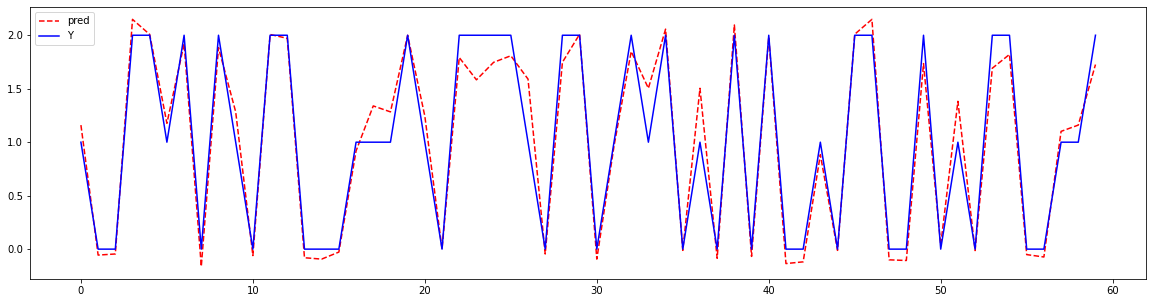

In [37]:
#  시각화 평가 
fig = plt.figure(figsize=(20, 5))
chart = fig.add_subplot(1,1,1)
chart.plot(y_pred, color='r', linestyle='--', label='pred')
chart.plot(y_true, color='b', linestyle='-', label='Y')

plt.legend(loc='best')
plt.show()